<a href="https://colab.research.google.com/github/solokind/EARLY-STAGE-IDENTIFICATION-OF-ALZHEIMER-S-DISEASE-THROUGH-MRI-IMAGE-ANALYSIS/blob/main/Alzheimers_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Augmented dataset.zip to Augmented dataset.zip


In [ ]:
!unzip "/content/Augmented dataset.zip" -d "/content/alzheimer-dataset"


Streaming output truncated to the last 5000 lines.
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (10).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (100).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (11).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (12).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (13).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (14).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (15).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (16).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (17).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (18).jpg  
  inflating: /content/alzheimer-dataset/OriginalDataset/NonDemented/31 (19).jpg  
  inflating: /content/alzheimer-dataset/Origin

In [ ]:
!ls /content/alzheimer-dataset


AugmentedAlzheimerDataset  OriginalDataset


In [ ]:
import os

train_path = "/content/alzheimer-dataset/AugmentedAlzheimerDataset"
test_path  = "/content/alzheimer-dataset/OriginalDataset"

print("Train folders:", os.listdir(train_path))
print("Test folders:", os.listdir(test_path))


Train folders: ['VeryMildDemented', 'ModerateDemented', 'NonDemented', 'MildDemented']
Test folders: ['VeryMildDemented', 'ModerateDemented', 'NonDemented', 'MildDemented']


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)


Found 33984 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1004s 944ms/step - accuracy: 0.4965 - loss: 1.0897 - val_accuracy: 0.6173 - val_loss: 0.7761
Epoch 2/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1031s 970ms/step - accuracy: 0.6164 - loss: 0.8235 - val_accuracy: 0.6416 - val_loss: 0.6932
Epoch 3/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 988s 930ms/step - accuracy: 0.6467 - loss: 0.7628 - val_accuracy: 0.6839 - val_loss: 0.6477
Epoch 4/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1003s 944ms/step - accuracy: 0.6775 - loss: 0.7037 - val_accuracy: 0.7159 - val_loss: 0.5742
Epoch 5/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 990s 932ms/step - accuracy: 0.6919 - loss: 0.6662 - val_accuracy: 0.7659 - val_loss: 0.5261
Epoch 6/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 999s 941ms/step - accuracy: 0.7055 - loss: 0.6398 - val_accuracy: 0.6955 - val_loss: 0.6238
Epoch 7/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1001s 943ms/step - accuracy: 0.7271 - loss: 0.6053 - val_accuracy: 0.8192 - val_loss: 0.4182
Epoch 8/10
1062/1062 ━━━━━━━━━━━━━━━━━━━━ 1059s 959ms/step

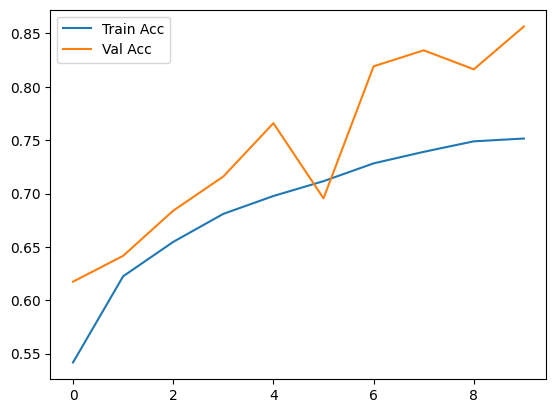

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img_path = '/content/alzheimer-dataset/OriginalDataset/ModerateDemented/27 (2).jpg'
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = model.predict(img_array)
class_names = list(train_set.class_indices.keys())

print("Prediction:", class_names[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: ModerateDemented
